In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [103]:
# This function comes from our extrema example in linear_algebra
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
z = np.array([1,2,3,2,1])

def multi_regression(x,y):
    return (2.5714*x) + (-0.4286 * (x**2)) - 1.2
    
z_pred = []
x_pred = []
y_pred = []
for i in np.linspace(0,5,20):
    x_pred.append(i)
    y_pred.append(i)
    z_pred.append(multi_regression(i, i))

In [104]:
# Differentiate
def df_x(x):
    return ((2.5714) + ((2*-0.4286) * (x)))

# Find zeros
indicies = []
for i in range(0, 5):
    if df_x(i+1) <= 0:
        indicies.append(i)

z_opt = np.zeros(len(indicies))
for i in range(0, len(z_opt)):
    z_opt[i] = multi_regression(indicies[i], indicies[i])

Text(0.5, 0, 'Z Label')

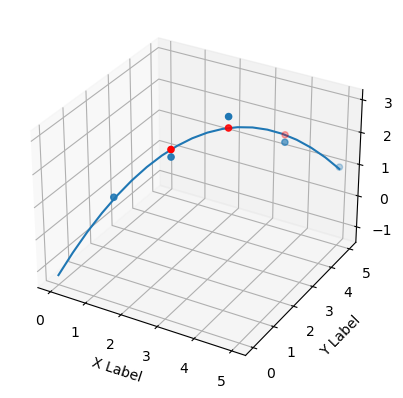

In [105]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.scatter(indicies, indicies, z_opt, color='red')
ax.plot(x_pred,y_pred,z_pred)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')